<a href="https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/ProcessDataWecode/data_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CS114/data_wecode

/content/drive/MyDrive/CS114/data_wecode


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Processing data wecode

In [ ]:
df_wecode = pd.read_csv('/content/drive/MyDrive/CS114/data_wecode/wecode.csv')

In [ ]:
df_wecode.columns

Index(['id', 'assignment_id', 'problem_id', 'user_id', 'is_final', 'status',
       'pre_score', 'coefficient', 'file_name', 'language_id', 'created_at',
       'updated_at'],
      dtype='object')

In [ ]:
df_wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [ ]:
# Thống kê Số problems giải quyết được của từng user_id thông qua tổng số is_final
data_problems = df_wecode[['user_id','is_final']]
problems = data_problems.groupby('user_id',as_index=False).sum()
problems

,user_id,is_final
0,1,2
1,4,38
2,5,5
3,6,88
4,7,2
...,...,...
1154,1860,48
1155,1862,6
1156,1864,63
1157,1865,17


In [ ]:
# Thống kê Tổng số submit của từng user_id thông qua id của từng user
data_sub = pd.DataFrame(df_wecode[['user_id','id']])
submits = data_sub.groupby('user_id',as_index=False).count()
submits

,user_id,id
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


In [ ]:
# Thống kê Tổng điểm với is_final = 1 bằng cách sum pre_score với is_final = 1
data_pre_score = pd.DataFrame(df_wecode[['user_id','is_final','pre_score']])
score = data_pre_score[data_pre_score['is_final']==1]
sum_score = score.groupby('user_id',as_index=False).sum()
sum_score.drop(columns='is_final',inplace=True)
sum_score

,user_id,pre_score
0,1,10000
1,4,370000
2,5,30000
3,6,850000
4,7,9209
...,...,...
1152,1860,329665
1153,1862,40000
1154,1864,439741
1155,1865,116428


In [ ]:
# Thống kê số problem xanh của từng user_id bằng cách sum cột is_final với điều kiện pre_score = 100000
count_10000 = pd.DataFrame(df_wecode[['user_id','is_final','pre_score']])
count_10000 = count_10000[count_10000['is_final']==1]
count_10000 = count_10000[count_10000['pre_score']==10000]
count_10000 = count_10000.groupby('user_id',as_index=False).sum()
count_10000.drop(columns='pre_score',inplace=True)
count_10000

,user_id,is_final
0,1,1
1,4,37
2,5,3
3,6,85
4,11,9
...,...,...
1134,1860,28
1135,1862,4
1136,1864,28
1137,1865,10


In [ ]:
# Đưa ra data result tổng hợp các số liệu trên
result = 0
problems.rename(columns={'is_final':'Sum_Problems'}, inplace=True)
submits.rename(columns={'id':'Sum_Submits'}, inplace=True)
sum_score.rename(columns={'pre_score':'Sum_Last_Score'}, inplace=True)
count_10000.rename(columns={'is_final':'Sum_Correct_Problems'}, inplace=True)
result = problems.merge(submits, how = 'left', on='user_id')
result = result.merge(sum_score, how='left', on='user_id')
result = result.merge(count_10000, how='left', on='user_id')

In [ ]:
result

,user_id,Sum_Problems,Sum_Submits,Sum_Last_Score,Sum_Correct_Problems
0,1,2,2,10000.0,1.0
1,4,38,54,370000.0,37.0
2,5,5,6,30000.0,3.0
3,6,88,130,850000.0,85.0
4,7,2,5,9209.0,NaN
...,...,...,...,...,...
1154,1860,48,76,329665.0,28.0
1155,1862,6,12,40000.0,4.0
1156,1864,63,187,439741.0,28.0
1157,1865,17,99,116428.0,10.0


In [ ]:
result.isnull().sum()

user_id                  0
Sum_Problems             0
Sum_Submits              0
Sum_Last_Score           2
Sum_Correct_Problems    20
dtype: int64

In [ ]:
# Điền các giá trị 0 nếu Sum_Correct_Problems (Tổng số bài xanh)
result.Sum_Correct_Problems = (result.Sum_Correct_Problems.fillna(0))
# drop những hàng sum_last_score bị NaN
result = result.dropna()

In [ ]:
data = result

In [ ]:
data.isnull().sum()

user_id                 0
Sum_Problems            0
Sum_Submits             0
Sum_Last_Score          0
Sum_Correct_Problems    0
dtype: int64

In [ ]:
# Data cuối cùng sau khi xử lý từ tập wecode.csv
data

,user_id,Sum_Problems,Sum_Submits,Sum_Last_Score,Sum_Correct_Problems
0,1,2,2,10000.0,1.0
1,4,38,54,370000.0,37.0
2,5,5,6,30000.0,3.0
3,6,88,130,850000.0,85.0
4,7,2,5,9209.0,0.0
...,...,...,...,...,...
1154,1860,48,76,329665.0,28.0
1155,1862,6,12,40000.0,4.0
1156,1864,63,187,439741.0,28.0
1157,1865,17,99,116428.0,10.0


## Data Score

In [93]:
df_score = pd.read_csv('/content/drive/MyDrive/CS114/data_wecode/score_training.csv')

In [94]:
df_score = df_score.rename(columns={"id": "user_id", "QT": "QT","GK":"GK","TH":"TH","CK":"CK","TBM":"TBM","TBTL":"TBTL"})

In [95]:
df_score

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [96]:
CK = df_score[['user_id','CK']]

In [97]:
CK

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


In [98]:
data_merge = pd.merge(data,CK,on='user_id',how='outer')
data_merge

,user_id,Sum_Problems,Sum_Submits,Sum_Last_Score,Sum_Correct_Problems,CK
0,1,2.0,2.0,10000.0,1.0,NaN
1,4,38.0,54.0,370000.0,37.0,NaN
2,5,5.0,6.0,30000.0,3.0,NaN
3,6,88.0,130.0,850000.0,85.0,NaN
4,7,2.0,5.0,9209.0,0.0,NaN
...,...,...,...,...,...,...
1275,1664,NaN,NaN,NaN,NaN,9
1276,1679,NaN,NaN,NaN,NaN,6
1277,1699,NaN,NaN,NaN,NaN,7
1278,1723,NaN,NaN,NaN,NaN,9


In [99]:
data_merge = data_merge.dropna()

In [100]:
# Data gồm wecode và điểm cuối kì sau khi merge và drop NaN
data_merge

,user_id,Sum_Problems,Sum_Submits,Sum_Last_Score,Sum_Correct_Problems,CK
9,24,77.0,164.0,750299.0,72.0,9.5
10,27,5.0,13.0,39000.0,3.0,10
11,29,80.0,199.0,762760.0,72.0,8.5
13,34,84.0,218.0,822888.0,81.0,6.5
14,35,151.0,297.0,1477000.0,145.0,4.5
...,...,...,...,...,...,...
1149,1856,31.0,64.0,270790.0,23.0,7.5
1150,1857,40.0,55.0,386000.0,37.0,4
1151,1859,30.0,31.0,39000.0,3.0,1.5
1153,1862,6.0,12.0,40000.0,4.0,7.5


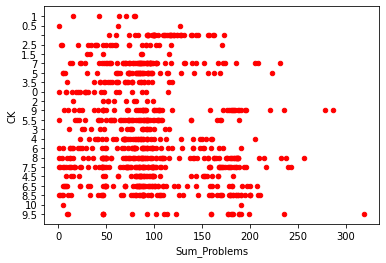

In [101]:
data_merge.plot(kind='scatter',x='Sum_Problems',y='CK',color='red')
plt.show()

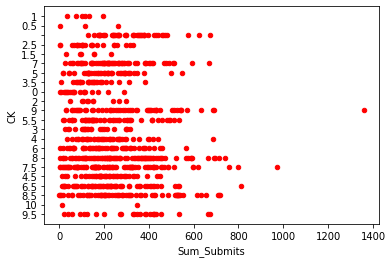

In [102]:
data_merge.plot(kind='scatter',x='Sum_Submits',y='CK',color='red')
plt.show()

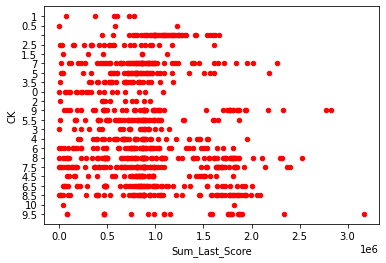

In [103]:
data_merge.plot(kind='scatter',x='Sum_Last_Score',y='CK',color='red')
plt.show()

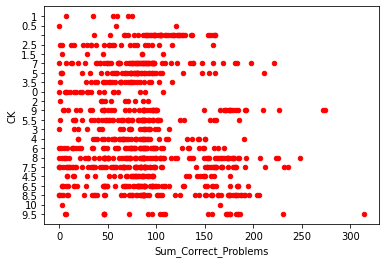

In [104]:
data_merge.plot(kind='scatter',x='Sum_Correct_Problems',y='CK',color='red')
plt.show()